## Varun Biren Majithia
## Student ID - 8894799

## Importing the necessary packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as fMNIST
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Loading the MNIST Dataset and exploring the Train and Test Set along with Train and Test Labels

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fMNIST.load_data()

# Explore the dataset's shape
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')

print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}',"\n")

print('Test Data:') 
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')

print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

# from class notebook

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,) 

Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


## Checking for balance of labels in the train set

In [3]:
num_of_classes = len(np.unique(train_labels))

# Creating a dictionary to store the distribution of samples
distribution_of_class_labels = {class_labels: 0 for class_labels in range(num_of_classes)}

# Count the occurrences 
for labels in train_labels:
    distribution_of_class_labels[labels] += 1

# Display the distribution 
for class_labels, count in distribution_of_class_labels.items():
    print(f"Class {class_labels}: consists {count} samples")

Class 0: consists 6000 samples
Class 1: consists 6000 samples
Class 2: consists 6000 samples
Class 3: consists 6000 samples
Class 4: consists 6000 samples
Class 5: consists 6000 samples
Class 6: consists 6000 samples
Class 7: consists 6000 samples
Class 8: consists 6000 samples
Class 9: consists 6000 samples


## My Inferences on the above class outcomes:-

For our model to learn the patterns accurately across the labels, it is essential to have a balanced dataset. A balanced training set means that the quantity of number of samples in each class is roughly equal and it is not heavily skewed. It help the model to prevent bias. When the train data is imbalanced the model may be biased towards a particular class since it has more number of data of that particular class. Moreover, a balanced train set will enable the model to get accurate prediction by having better decsion boundaries leading to a fair and robust model with good generalization to unseen data. Our training set is perferctly balanced train set with equal number of samples for each label which will help the model to learn the patterns effectively

### Visualizing some handwritten digits 

Number of classes: 10


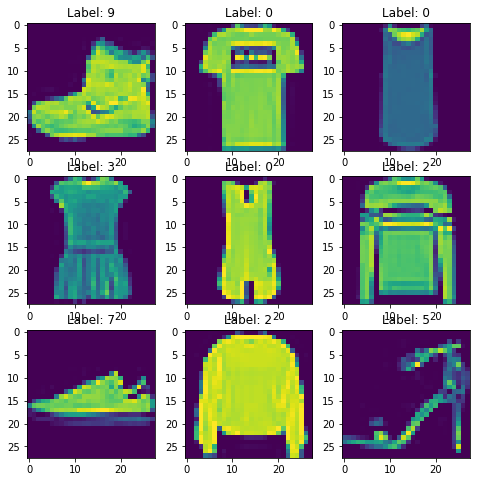

In [4]:
# As we know we have 0-9 (10 unique labels)
num_of_classes = len(np.unique(train_labels))
print("Number of classes:", num_of_classes)

# Visualization
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='viridis')
    ax.set_title("Label: {}".format(train_labels[i]))
plt.show()

### Visualizing unique handwritten digits 

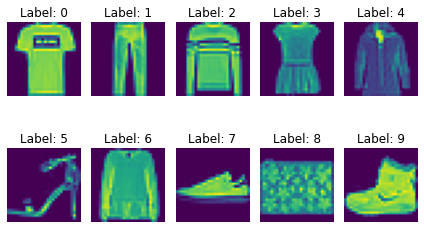

In [5]:
for i in range(10):
    # each unique class is represented by i here (this will find the index of the first image in the train set belonging to a unique class)
    unique_index = train_labels.tolist().index(i) 
    plt.subplot(2, 5, i + 1) # 2 rows and 5 columns
    plt.imshow(train_images[unique_index], cmap='viridis')
    plt.title("Label: {}".format(i))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1
test_images = test_images.reshape((10000, 28 * 28))

# Preprocess the data and converting it between 0 and 1
train_images = train_images.astype('float') / 255.0
test_images = test_images.astype("float") / 255.0

In [7]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the Model

In [7]:
# Build the model

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4729 - accuracy: 0.8314
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3597 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8818: 0s - loss: 0.3217 - accuracy: 0.88 - ETA: 0s - loss:
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.8968
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2524 - accuracy: 0.9049
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.9100
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2306 - accuracy: 0.9138
Epoch 10/10
1875/1875 [=====

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 512)                 401920    
                                                                 
 dense_1 (Dense)             (32, 10)                  5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## The model achieved an accuracy of 91.55% on train data

### My Inferences


The term "Dense" describes a particular type of neural network layer. Each neuron in the dense neural layer is connected to every other neuron in all the previous layers, making it a fully connected layer. All of the input neurons from the layers before it contribute to the output of the final layer.

The precise number of neurons in a specific layer of a nn is denoted by the numbers "512," and "10." The nerons are the hyperparameters that can be altered or updated depending on the requirements of the model building and model training

#### Reasons to choose activation function  "relu"

relu is a non-linear activation function. ReLU introduced non-linearity to the model allowing the model to understand complex relationship in the data.ReLu is far more computationally efficiently as compared to other activation fucntions as it activates only a certain number of neurons. The constant gradient of ReLU allows it to be a more stable approach in for positive inputs as compared to some of the other activation functions.

#### Reasons to choose activation function "softmax" for output layer

Softmax activation function is commonly used for the output layer of the nn for classification tasks because it convert the raw output of the output layer of neural network into a probability distribution over classes. Each class gets a score between 0 and 1. It is very well suited for multiclass classification problems. Because it produces smooth and diffrenciable outputs it is very well suited for backpropogation as well.

#### Reasons to choose ADAM optimizer 

Adam optimizer adapts the learning rate of each param of nn. It incorporates both moving averages of squared gradients and momentum. The adaptive learning rates and bias correction mechanisms helps to improve the convergence and overall optimization.

#### Reasons to choose Sparse_categorical_crossentropy

Sparse Categorical Cross Entropy is preferred for multi-class classification tasks with integer labels, as it avoids the memory and computational overhead of one-hot encoding. It offers numerical stability, and efficiently handles tasks with numbers of classes, making it a flexible and efficient.

## Visualizing a test image that I am trying to predict

### The test label for 9 is label "7" 

In [10]:
test_labels[9]

7

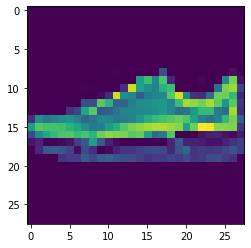

In [11]:
plt.imshow(test_images[9:10].reshape(28,28), cmap='viridis')  # the actual image

## Predicting the test label [9] i.e Label "7"

In [12]:
pred = model.predict(test_images[9:10])
pred

array([[2.2175166e-11, 9.2489931e-12, 8.1241464e-14, 2.9855956e-14,
        1.8981375e-13, 2.7514847e-07, 1.2816863e-13, 9.9999917e-01,
        3.4615424e-10, 5.8618787e-07]], dtype=float32)

### Accuarcy for predicting "Label 7".

In [13]:
pred[0,7]

0.99999917

## Inferences

#### We can see from the above output we can say that our model has shown the highest probability for class "7" meaning it has correctly predicted the label.

## Evaluating the Model using test data

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Get model predictions oj test data
model_predictions = model.predict(test_images)
pred_labels = np.argmax(model_predictions, axis=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8831
Test accuracy: 0.8830999732017517


## My inferences:-

### From the above results we can clearly see the model has performed well and has good generalization capabilties as it has generated an accuracy of 88.30% on test data

# Confusion Matrix 

In [15]:
# Create the confusion matrix
confusion_matrix = confusion_matrix(test_labels, pred_labels)
confusion_matrix

array([[811,   1,  10,  21,   4,   1, 145,   0,   7,   0],
       [  5, 977,   0,   9,   4,   0,   4,   0,   1,   0],
       [  7,   0, 712,  11, 147,   0, 123,   0,   0,   0],
       [ 11,   7,   7, 899,  30,   0,  41,   0,   5,   0],
       [  0,   0,  65,  33, 810,   0,  92,   0,   0,   0],
       [  0,   0,   0,   1,   0, 975,   0,  14,   2,   8],
       [100,   1,  54,  25,  50,   0, 763,   0,   7,   0],
       [  0,   0,   0,   0,   0,  20,   0, 968,   0,  12],
       [  6,   0,   2,   2,   2,   2,   6,   2, 978,   0],
       [  0,   0,   0,   1,   0,  20,   1,  40,   0, 938]], dtype=int64)

## Correctly classified Labels :-

Label 0: The model has correctly classified 811 (81.1%) samples

Label 1:-The model has correctly classified 977 (97.7%) samples

Label 2:- The model has correctly classified 712 (71.2%) samples

Label 3:- The model has correctly classified 899 (89.9%) samples

Label 4:- The model has correctly classiefied 810 (81.0%) samples

Label 5:- The model has correctly classified 975 (97.5%) samples 

Label 6:- The model has correctly classified 763 (76.3%) samples

Label 7:- The model has correctly classified 968 (96.8%) samples

Label 8:- The model has correctly classified 978 (97.8%) samples 

Label 9:- The model has correctly classified 938 (93.8%) samples

<Figure size 720x792 with 0 Axes>

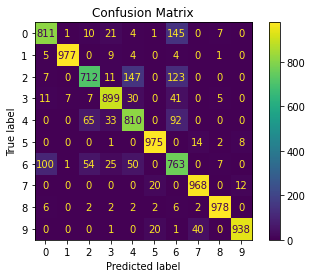

In [16]:
#Plot the confusion matrix
plt.figure(figsize=(10,11))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

## Interpreting and understanding the missclassified labels 

Label 0: It has a higher chance of being misclassified as "6" becuase we can see that it has been misclassified 145 times(14.5% of the total)  as label "6"

Label 1: It has a higher chance of being misclassified as Label "3" because it has been missclassified 9 times (0.9% of the total) as label "3". 

Label 2: It has a higher chance of being misclassified as "4" (14.7%) times and "6" (12.3%) times of the total, as it has been misclassified as "4" 147 times and as "6" 123 times).

Label 3: It has a higher chance of being misclassified as "6" (4.1%) times of the total, because it has been misclassified as "6" (41 times) and as "4"  (3%) of the total as label "4" 30 times.

Label 4: It has a higher chance of being misclassified as "6" (9.2%) times of the total because it has been misclassified as "6" (92 times) and as "2" (6.5%) times of the total (65 times) and as "3" (3.3%) times of the total (33 times).

Label 5: It has a higher chance of being misclassified as "7" (1.4%) times of the total (14 times) and as "9" (0.8%) (8 times) 

Label 6: It has a higher chance of being misclassified as "0" (10% of the total) (100 times), as "2" (5.4%) (54 times), and as "3" (5%) (50 times) of the total.

Label 7: It has a higher chance of being misclassified as "5" (2%) (20 times), as "9" (1.2%) (12 times).

Label 8: It has a higher chance of being misclassified as "6" (0.6%) (6 times) and as "0" (0.6%) (6 times).

Label 9: It has a higher chance of being misclassified as "7" (4%) (40 times) and "5" (2%) (20 times) of the total.

# Visualizing Misclassified Labels

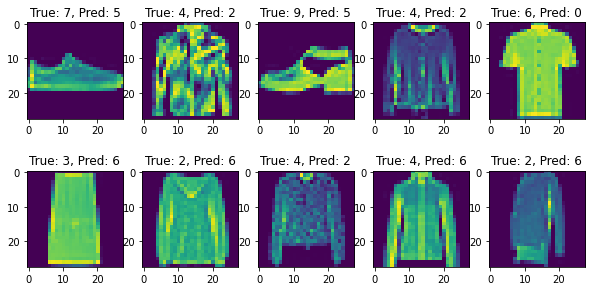

In [16]:
missclassified = np.where(pred_labels != test_labels)[0]

# Plot some of the misclassified images
plt.figure(figsize=(10, 5))
for i, index in enumerate(missclassified[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='viridis')
    plt.title(f"True: {test_labels[index]}, Pred: {pred_labels[index]}")
plt.show()

## Interpreting a few missclassified labels:-

From the labels above as well as the confusion matrix we can get insights on what particular labels have a higher probability of being classified as a particular label. For e.g Label "7" has a higher chance of being classified as "5", Label "4" as label "2", "9" as "5", "4" as "2", "6" as a "0" and so on.

The interpreatation that I could make is that the model is facing difficulty in distinguishing visually similar items. The reasons of missclassification is similarity between features and patterns of classes, which makes it difficult for the model to distingusih between them.